In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

R2 Score: 0.8082344163778457
Mean Squared Error (MSE): 842.656451328749
Mean Absolute Error (MAE): 22.010125365792447
Root Mean Squared Error: 29.03


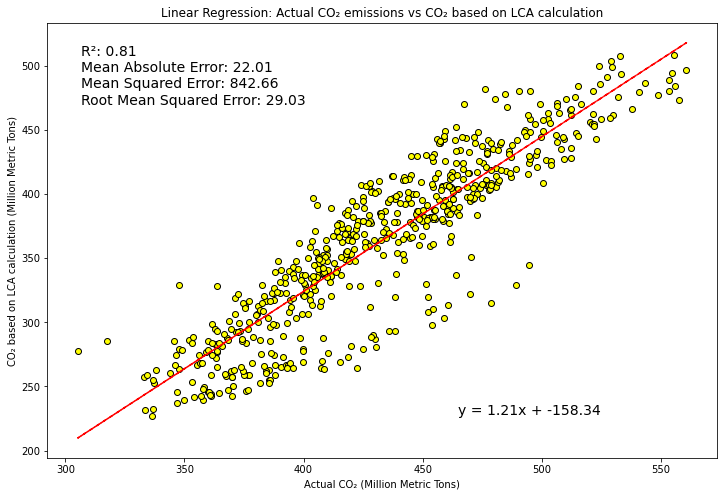

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read the CSV dataset into a pandas DataFrame
df = pd.read_csv('LCACO2_ActualCO2.csv')


x_column = 'Actual CO2_ (Million Metric Tons)'
y_column = 'CO2_ based on LCA calculation (Million Metric Tons)'

# Extract the columns of interest from the DataFrame
x = df[x_column].values.reshape(-1, 1)  # Reshape the input to a 2D array
y = df[y_column].values

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Get the slope (coefficient) and intercept of the linear regression line
slope = model.coef_[0]
intercept = model.intercept_

# Add the equation as text on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Generate the predicted y-values using the model
y_pred = model.predict(x)
# Calculate evaluation metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

# Print the evaluation metrics
print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error:", format(rmse, ".2f"))

plt.figure(figsize=(12, 8))  # Specify the width and height in inches

# Plot the data points and regression line
plt.scatter(x, y, color='yellow', edgecolor='black', label='Actual')
plt.plot(x, y_pred, color='red', label='Linear Regression', linestyle='--')
plt.xlabel('Actual CO₂ (Million Metric Tons)')
plt.ylabel('CO₂ based on LCA calculation (Million Metric Tons)')
plt.title('Linear Regression: Actual CO₂ emissions vs CO₂ based on LCA calculation')

textstr = f'R²: {format(r2, ".2f")}\nMean Absolute Error: {format(mae, ".2f")}\nMean Squared Error: {format(mse, ".2f")}\nRoot Mean Squared Error: {format(rmse, ".2f")}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', fontsize=14)
plt.text(0.6, 0.2, equation, transform=plt.gcf().transFigure, fontsize=14)
#plt.savefig('Decision Tree Actual CO₂ emissions vs Predicted CO₂ emissions.jpg')
plt.show()

